In [ ]:
import networkx as nx
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
with open("WG.pickle", 'rb') as f:
    G = pickle.load(f)

In [ ]:
Gcc = sorted(nx.weakly_connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])

In [ ]:
nodes = list(G.nodes())

In [ ]:
sub = list(G.neighbors(nodes[10]))

In [ ]:
H = G.subgraph(sub)

In [ ]:
H.nodes(data=True)["Buse"]["color"] = "test"

In [ ]:
for node in H.nodes():
    print(node)

Fringilla Vigo
Buse
Ramerot
Corbin


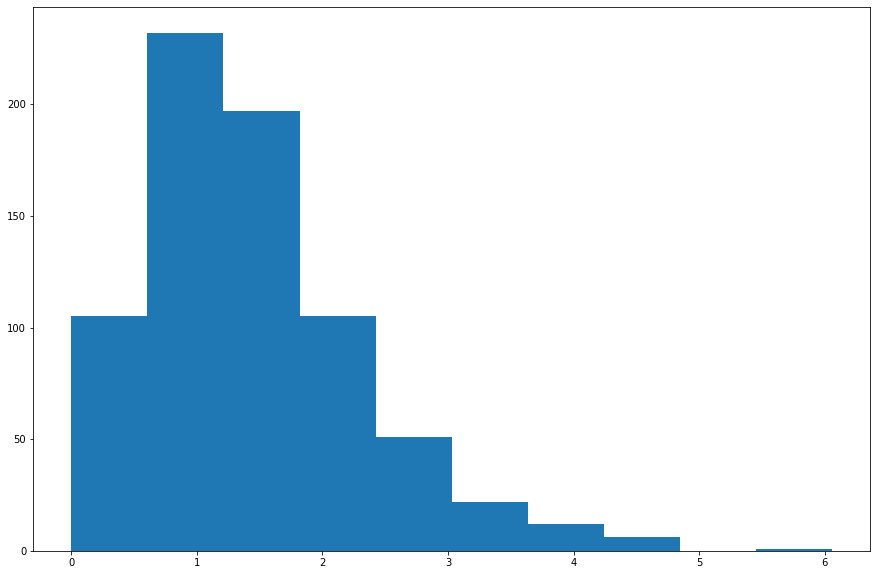

In [ ]:
plt.figure(figsize=(15,10))
plt.hist(np.log(degrees))
plt.savefig('degree_dist.jpg',bbox_inches='tight', dpi=150)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=061c6de9-714b-4aa5-8dca-7fde3082e296' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>